## Sandbox for interacting with the ARASAAC API

In [3]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.8 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 2.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 kB 2.6 MB/s eta 0:00:003.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 1.9 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 2.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 2.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 2.8 MB/s eta 0:00:00m eta 0:00:010:01:01

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import requests
import seaborn as sns
from collections import Counter
import numpy as np
from PIL import Image
from io import BytesIO
#from IPython.display import display, Image, HTML
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [6]:
base_url = "https://api.arasaac.org/api"
language = "en"



In [7]:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [8]:
pd.reset_option('display.max_rows')

In [3]:
# To get a general sense of the categories in ARASAAC
def get_pictos(lang = "en", limit=500):
  url = f'{base_url}/pictograms/all/{lang}'
  response = requests.get(url)
  if response.status_code == 200:
    data = response.json()
    return data[:limit] if limit else data
  else:
    print(f'Error: {response.status_code}')
    return []

def get_keywords(pictograms):
  categories = []
  item_dict = {}
  for pictogram in pictograms:
    if 'categories' in pictogram and pictogram['categories']:
      for category in pictogram['categories']:
        categories.append(category)

        if category not in item_dict:
          item_dict[category] = []

        item_dict[category].append(pictogram['_id'])

  category_counts = Counter(categories)

  df_data = []

  for category, count in category_counts.most_common():
        sample_ids = item_dict[category][:3]
        
        sample_keywords = []
        for pic_id in sample_ids:
            for pic in pictograms:
                if pic["_id"] == pic_id and "keywords" in pic and pic["keywords"]:
                    sample_keywords.append(pic["keywords"][0]["keyword"] 
                                         if pic["keywords"][0]["keyword"] else "Unknown")
                    break
        
        df_data.append({
            "Category": category,
            "Pictogram Count": count,
            "Percentage": round((count / len(pictograms)) * 100, 2),
            "Sample Pictogram IDs": ", ".join(map(str, sample_ids)),
            "Sample Keywords": ", ".join(sample_keywords[:3])
        })
    
  df = pd.DataFrame(df_data)
  return df

print("Fetching pictograms data... (this may take a moment)")
pictograms = get_pictos(language)
print(f"Retrieved {len(pictograms)} pictograms")

categories_df = get_keywords(pictograms)
print("\nCategory Statistics:")
display(categories_df)






Fetching pictograms data... (this may take a moment)


NameError: name 'language' is not defined

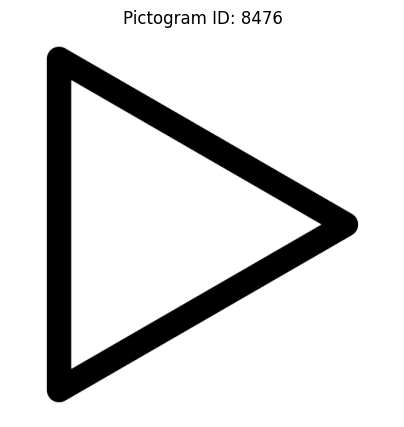

In [5]:
# we can visualize pictograms by passing the id and resolution to the api url
def print_picto(id, resolution=500):
  url = f'https://static.arasaac.org/pictograms/{id}/{id}_{resolution}.png'

  response = requests.get(url)
  if response.status_code == 200:
      img = Image.open(BytesIO(response.content))
      
      plt.figure(figsize=(5, 5))
      plt.imshow(img)
      plt.axis('off')
      plt.title(f"Pictogram ID: {id}")
      plt.show()
  else:
      print(f"Error: Could not retrieve pictogram {id}. Status code: {response.status_code}")

print_picto(8476) #7028, 8477, 7028, 8477, 6627, 6632, 16885, 5526, 6603, 5374, 4601, 22620


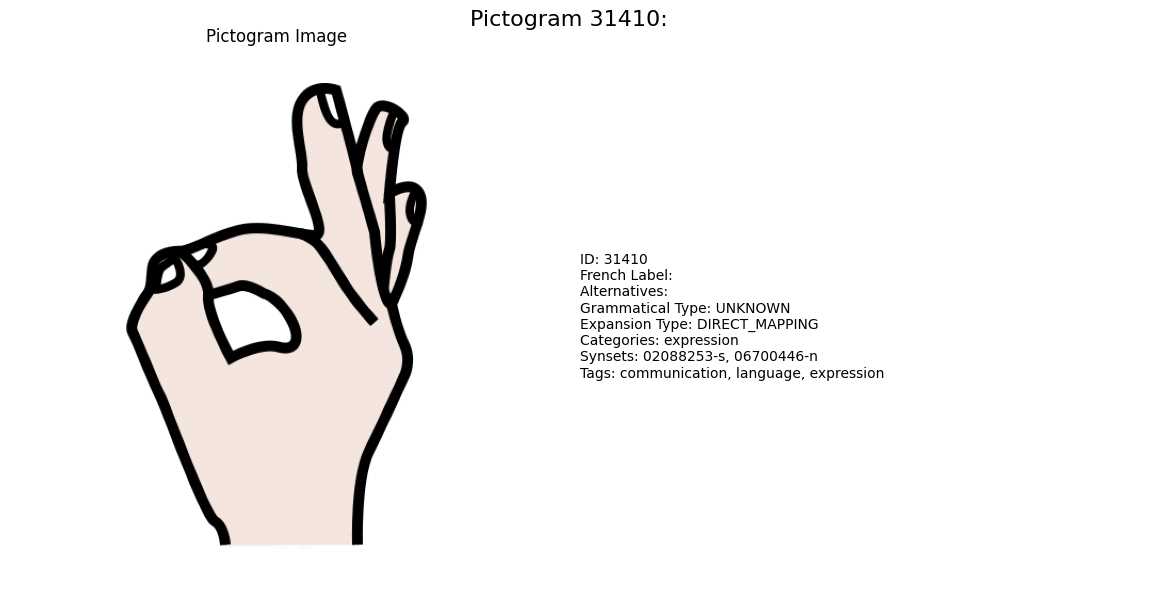


Raw Metadata:
{
  "schematic": false,
  "sex": false,
  "violence": false,
  "aac": false,
  "aacColor": false,
  "skin": true,
  "hair": false,
  "downloads": 0,
  "categories": [
    "expression"
  ],
  "synsets": [
    "02088253-s",
    "06700446-n"
  ],
  "tags": [
    "communication",
    "language",
    "expression"
  ],
  "_id": 31410,
  "created": "2017-05-13T09:43:27.000Z",
  "lastUpdated": "2021-07-24T16:38:22.195Z",
  "keywords": [
    {
      "type": 5,
      "keyword": "ok",
      "hasLocution": true
    },
    {
      "keyword": "OK",
      "hasLocution": true,
      "type": 5
    },
    {
      "keyword": "d'accord",
      "hasLocution": true,
      "type": 5
    }
  ],
  "desc": ""
}...


In [37]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import json
from IPython.display import display

def get_pictogram_metadata(picto_id, language="fr"):
    """Get metadata for a pictogram from ARASAAC API"""
    url = f"https://api.arasaac.org/v1/pictograms/{language}/{picto_id}"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            return response.json()
        else:
            print(f"Error: Could not retrieve metadata for {picto_id}. Status code: {response.status_code}")
            return None
    except Exception as e:
        print(f"Exception: {str(e)}")
        return None

def get_pictogram_image(picto_id, resolution=500):
    """Get the pictogram image"""
    url = f"https://static.arasaac.org/pictograms/{picto_id}/{picto_id}_{resolution}.png"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            return Image.open(BytesIO(response.content))
        else:
            print(f"Error: Could not retrieve image for {picto_id}. Status code: {response.status_code}")
            return None
    except Exception as e:
        print(f"Exception: {str(e)}")
        return None

def extract_key_metadata(raw_data, language="fr"):
    """Extract key metadata fields from raw API response"""
    if not raw_data:
        return {}
    
    # Get pictogram ID
    picto_id = raw_data.get("_id")
    
    # Extract French keywords
    fr_keywords = []
    fr_primary = ""
    
    for keyword in raw_data.get("keywords", []):
        if keyword.get("language") == language:
            keyword_text = keyword.get("keyword", "")
            if not fr_primary:
                fr_primary = keyword_text
            fr_keywords.append(keyword_text)
    
    # Determine grammatical type from categories
    categories = raw_data.get("categories", [])
    grammatical_type = "UNKNOWN"
    categories_lower = [c.lower() for c in categories]
    
    if any(c in categories_lower for c in ['noun', 'name', 'object', 'person', 'place']):
        grammatical_type = "NOUN"
    elif any(c in categories_lower for c in ['verb', 'action', 'movement']):
        grammatical_type = "VERB"
    elif any(c in categories_lower for c in ['adjective', 'description', 'quality']):
        grammatical_type = "ADJ"
    elif any(c in categories_lower for c in ['adverb', 'time', 'manner']):
        grammatical_type = "ADV"
    elif any(c in categories_lower for c in ['preposition']):
        grammatical_type = "PREP"
    elif any(c in categories_lower for c in ['pronoun']):
        grammatical_type = "PRON"
    elif any(c in categories_lower for c in ['conjunction']):
        grammatical_type = "CONJ"
    elif any(c in categories_lower for c in ['determinant', 'article']):
        grammatical_type = "DET"
    
    # Determine expansion type
    if grammatical_type == "NOUN":
        expansion_type = "DETERMINER_NOUN"
    elif grammatical_type == "VERB":
        expansion_type = "VERB_WITH_TENSE"
    elif grammatical_type == "ADJ":
        expansion_type = "ATTRIBUTIVE_ADJ"
    elif grammatical_type == "ADV":
        expansion_type = "SIMPLE_ADV"
    elif grammatical_type == "PREP":
        expansion_type = "SIMPLE_PREP"
    else:
        expansion_type = "DIRECT_MAPPING"
    
    # Return structured metadata
    return {
        "id": picto_id,
        "fr_label": fr_primary,
        "fr_alternatives": fr_keywords[1:] if len(fr_keywords) > 1 else [],
        "categories": categories,
        "grammatical_type": grammatical_type,
        "synsets": raw_data.get("synsets", []),
        "tags": raw_data.get("tags", []),
        "expansion_type": expansion_type,
        "properties": {
            "schematic": raw_data.get("schematic", False),
            "sex": raw_data.get("sex", False),
            "violence": raw_data.get("violence", False),
            "downloads": raw_data.get("downloads", 0),
            "desc": raw_data.get("desc", "")
        }
    }

def display_pictogram_with_metadata(picto_id):
    """Display a pictogram with its metadata"""
    # Get metadata and image
    raw_data = get_pictogram_metadata(picto_id)
    metadata = extract_key_metadata(raw_data)
    img = get_pictogram_image(picto_id)
    
    # Create figure for display
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(f"Pictogram {picto_id}: {metadata.get('fr_label', 'Unknown')}", fontsize=16)
    
    # Display image
    if img:
        ax1.imshow(img)
        ax1.set_title("Pictogram Image")
        ax1.axis('off')
    else:
        ax1.text(0.5, 0.5, f"No image for ID {picto_id}", 
                 horizontalalignment='center',
                 verticalalignment='center')
        ax1.axis('off')
    
    # Display metadata
    ax2.axis('off')
    if metadata:
        metadata_text = "\n".join([
            f"ID: {metadata.get('id', 'Unknown')}",
            f"French Label: {metadata.get('fr_label', 'Unknown')}",
            f"Alternatives: {', '.join(metadata.get('fr_alternatives', []))}",
            f"Grammatical Type: {metadata.get('grammatical_type', 'Unknown')}",
            f"Expansion Type: {metadata.get('expansion_type', 'Unknown')}",
            f"Categories: {', '.join(metadata.get('categories', []))}",
            f"Synsets: {', '.join(metadata.get('synsets', []))}",
            f"Tags: {', '.join(metadata.get('tags', []))}"
        ])
        ax2.text(0, 0.5, metadata_text, verticalalignment='center')
    else:
        ax2.text(0, 0.5, "No metadata available", verticalalignment='center')
    
    plt.tight_layout()
    plt.show()
    
    # Print raw metadata for reference
    if raw_data:
        print("\nRaw Metadata:")
        print(json.dumps(raw_data, indent=2, ensure_ascii=False)[:1000] + "...")

picto_id = 31410   #6632, 36480, 31410
display_pictogram_with_metadata(picto_id)


In [ ]:
def get_metadata(pictogram_data):

In [ ]:
def print_grid(pico_files, out_file="layout.png", grid=(5, 5)):
  